# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/datasets/ealaxi/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [13]:
# Your code here

## Importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import imblearn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import DecisionTreeClassifier

In [19]:
data = pd.read_csv("/Users/caionunez/Downloads/PS_20174392719_1491204439457_log.csv").sample(1000000)
print(data.shape)
data.head()

(1000000, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3971530,297,PAYMENT,825.54,C1937876142,0.00,0.00,M1022738370,0.00,0.00,0,0
1371594,138,PAYMENT,14862.89,C64401466,61650.00,46787.11,M959468027,0.00,0.00,0,0
118535,11,CASH_OUT,53321.81,C929643735,0.00,0.00,C409060521,2042322.34,2665856.06,0,0
5193766,369,PAYMENT,11216.40,C141620937,214929.59,203713.19,M424037423,0.00,0.00,0,0
5140264,356,CASH_OUT,117.05,C218898777,38428.86,38311.81,C160840537,1490943.54,1491060.59,0,0


In [20]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1000000.000000,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000
mean,243.405510,1.806395e+05,8.328807e+05,8.543091e+05,1.099738e+06,1.224374e+06,0.001340,0.000001
std,142.476961,6.185435e+05,2.883078e+06,2.918763e+06,3.388608e+06,3.676593e+06,0.036581,0.001000
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,155.000000,1.341511e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,239.000000,7.503728e+04,1.424776e+04,0.000000e+00,1.329255e+05,2.138667e+05,0.000000,0.000000
75%,335.000000,2.089625e+05,1.072873e+05,1.451902e+05,9.445696e+05,1.112732e+06,0.000000,0.000000
max,743.000000,6.384799e+07,5.958504e+07,4.958504e+07,3.249151e+08,3.555534e+08,1.000000,1.000000


In [21]:
## I'm thinking the outcome mentioned is the represented in the column "isFraud"

data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [22]:
data["isFraud"].value_counts()

0    998660
1      1340
Name: isFraud, dtype: int64

In [23]:
data["isFlaggedFraud"].value_counts()

0    999999
1         1
Name: isFlaggedFraud, dtype: int64

In [24]:
data["type"].value_counts()

CASH_OUT    350876
PAYMENT     337961
CASH_IN     220737
TRANSFER     83854
DEBIT         6572
Name: type, dtype: int64

In [25]:
data.corr()

## None of the columns appear to be highly correlated

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022152,-0.010426,-0.010768,0.026199,0.024653,0.032884,0.002180
amount,0.022152,1.000000,-0.002622,-0.007568,0.305381,0.472149,0.071674,0.005490
oldbalanceOrg,-0.010426,-0.002622,1.000000,0.998807,0.067611,0.043007,0.009904,0.000952
newbalanceOrig,-0.010768,-0.007568,0.998807,1.000000,0.069179,0.042784,-0.007904,0.000933
oldbalanceDest,0.026199,0.305381,0.067611,0.069179,1.000000,0.976190,-0.006897,-0.000325
newbalanceDest,0.024653,0.472149,0.043007,0.042784,0.976190,1.000000,-0.000392,-0.000333
isFraud,0.032884,0.071674,0.009904,-0.007904,-0.006897,-0.000392,1.000000,0.027300
isFlaggedFraud,0.002180,0.005490,0.000952,0.000933,-0.000325,-0.000333,0.027300,1.000000


### What is the distribution of the outcome? 

In [26]:
# Your response here

## Briging the value counts for the column again. I'm thinking that with this result, considering it's the
## imbalance labs, we should do balance them out before proceeding.

data["isFraud"].value_counts()

0    998660
1      1340
Name: isFraud, dtype: int64

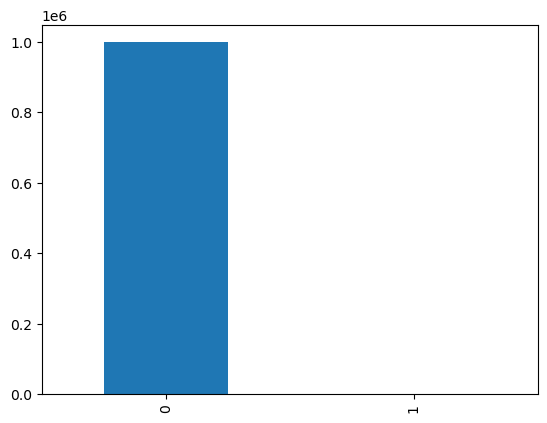

In [27]:
data["isFraud"].value_counts().plot(kind="bar")
plt.show()

## Quite unbalanced

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [28]:
# Your code here

## I don't understand the question about the time variable, but I'm removing the name columns as they appear to not add any value. The other
## string column, "Type" will not be dropped as it seems relevant to the understanding of the data. I'll create
## dummies for it.

data.drop(columns = (["nameOrig", "nameDest"]), inplace = True)
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3971530,297,PAYMENT,825.54,0.00,0.00,0.00,0.00,0,0
1371594,138,PAYMENT,14862.89,61650.00,46787.11,0.00,0.00,0,0
118535,11,CASH_OUT,53321.81,0.00,0.00,2042322.34,2665856.06,0,0
5193766,369,PAYMENT,11216.40,214929.59,203713.19,0.00,0.00,0,0
5140264,356,CASH_OUT,117.05,38428.86,38311.81,1490943.54,1491060.59,0,0


In [31]:
dummies = pd.get_dummies(data['type'], prefix = "type")
data = pd.concat([data, dummies], axis=1)
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
3971530,297,PAYMENT,825.54,0.00,0.00,0.00,0.00,0,0,0,0,0,1,0
1371594,138,PAYMENT,14862.89,61650.00,46787.11,0.00,0.00,0,0,0,0,0,1,0
118535,11,CASH_OUT,53321.81,0.00,0.00,2042322.34,2665856.06,0,0,0,1,0,0,0
5193766,369,PAYMENT,11216.40,214929.59,203713.19,0.00,0.00,0,0,0,0,0,1,0
5140264,356,CASH_OUT,117.05,38428.86,38311.81,1490943.54,1491060.59,0,0,0,1,0,0,0


In [34]:
#data.drop(["type"], axis = 1, inplace = True)
data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
3971530,297,825.54,0.00,0.00,0.00,0.00,0,0,0,0,0,1,0
1371594,138,14862.89,61650.00,46787.11,0.00,0.00,0,0,0,0,0,1,0
118535,11,53321.81,0.00,0.00,2042322.34,2665856.06,0,0,0,1,0,0,0
5193766,369,11216.40,214929.59,203713.19,0.00,0.00,0,0,0,0,0,1,0
5140264,356,117.05,38428.86,38311.81,1490943.54,1491060.59,0,0,0,1,0,0,0


In [38]:
## I'll create a baseline model with data like this, and then do the balancing and run the other models
## requested in the cells below.

X = data.drop(columns = ["isFraud"])
y = data["isFraud"]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(X_train, y_train)
print("Train accuracy score: ", log_reg.score(X_train, y_train))
print("Test accuracy score: ", log_reg.score(X_test, y_test))

## okay I think they are not as good as they seem due to the data being so unbalanced. 

Train accuracy score:  0.9981973333333334
Test accuracy score:  0.99824


In [39]:
from sklearn.metrics import confusion_matrix

pred = log_reg.predict(X_test)
confusion_matrix(y_test, pred)

## A lot of false negatives considering the actual number of negatives, will proceed with the balancing

array([[249419,    257],
       [   183,    141]])

In [41]:
## Oversampling of the data

train = pd.concat([X_train,y_train], axis = 1)
no_fraud = train[train["isFraud"]==0]
yes_fraud = train[train["isFraud"]==1]

print(no_fraud.shape)
print(yes_fraud.shape)

(748984, 13)
(1016, 13)


In [42]:
## Oversampling in the minority

from sklearn.utils import resample

yes_fraud_oversampled = resample(yes_fraud, ## -- > oversample from here
                                   replace = True, ## -- > we need replacement since we don't have enough datapoints. This will always be used for oversampling
                                   n_samples = len(no_fraud), ## --> matching the lenghts/nº of observations for both yes/no diabetes
                                   random_state=0) 

print(no_fraud.shape)
print(yes_fraud_oversampled.shape)

(748984, 13)
(748984, 13)


In [43]:
train_over = pd.concat([no_fraud, yes_fraud_oversampled])
print(train_over.shape)
train_over.head()

(1497968, 13)


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud
6258077,599,3118.07,691532.00,688413.93,0.00,0.00,0,0,0,0,1,0,0
408921,18,88732.48,108.00,88840.48,272817.72,184085.24,0,1,0,0,0,0,0
6300210,681,454.83,122.00,0.00,0.00,0.00,0,0,0,0,1,0,0
5400141,377,14467.89,336004.27,321536.38,0.00,0.00,0,0,0,0,1,0,0
2048181,181,487887.45,0.00,0.00,563517.54,1051404.99,0,0,0,0,0,1,0


### Run a logisitc regression classifier and evaluate its accuracy.

In [44]:
# Your code here

## Data is now balanced, will run a logistic regression

X_train_over = train_over.drop(columns = ["isFraud"], axis=1)
y_train_over = train_over["isFraud"]

log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(X_train_over, y_train_over)
print("Train accuracy score: ", log_reg.score(X_train_over, y_train_over))
print("Test accuracy score: ", log_reg.score(X_test, y_test))

Train accuracy score:  0.9252046772694744
Test accuracy score:  0.935416


In [45]:
pred = log_reg.predict(X_test)
confusion_matrix(y_test, pred)

## Although accuracy decreased, there are considerably less false negatives.
## From what I understand that is a relevant improvement

array([[233568,  16108],
       [    38,    286]])

### Now pick a model of your choice and evaluate its accuracy.

In [49]:
# Your code here

## Going with Decision Tree
from sklearn.tree import DecisionTreeClassifier

## Initializing model
tree = DecisionTreeClassifier(max_depth=10) ## Max depth means we want to make 10 splits/levels at maximum

## Training the model
tree.fit(X_train_over,y_train_over)

##Score/eveluation

print("test data accuracy is:", tree.score(X_test,y_test))
print("training data accuracy is:", tree.score(X_train_over,y_train_over))

test data accuracy is: 0.991852
training data accuracy is: 0.9959631981457547


In [50]:
pred = tree.predict(X_test)
confusion_matrix(y_test, pred)

array([[247662,   2014],
       [    23,    301]])

### Which model worked better and how do you know?

In [51]:
# Your response here

## I believe the decision tree model after the balancing is the best alternative. The accuracy score is high
## and we decreased the numbers of false negatives a lot, which is important considering the fraud/no fraud scenario.

In [52]:
## Using other metrics for evaluation

from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

## Logistic regression other metrics

pred = log_reg.predict(X_test)
print("recall", recall_score(y_test, pred))
print(classification_report(y_test,pred))

recall 0.8827160493827161
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    249676
           1       0.02      0.88      0.03       324

    accuracy                           0.94    250000
   macro avg       0.51      0.91      0.50    250000
weighted avg       1.00      0.94      0.97    250000



In [53]:
## Decision tree other metrics

pred = tree.predict(X_test)
print("recall", recall_score(y_test, pred))
print(classification_report(y_test,pred))

recall 0.9290123456790124
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    249676
           1       0.13      0.93      0.23       324

    accuracy                           0.99    250000
   macro avg       0.56      0.96      0.61    250000
weighted avg       1.00      0.99      0.99    250000



### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.